In [75]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
from tabGAN.tabGAN import TableGAN
from src import constants as const
import utils

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [77]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [78]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [79]:
n_epochs = 100
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0

retrain = False

In [6]:
tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)
n_epochs_vec = np.arange(1, 26, 1).tolist() + np.arange(30, 101, 5).tolist()
n_synthetic_datasets_epochs_comparison = 5



In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_epochs_fast(
    tg_qtr,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder = "tabGAN-qtr",
    batch_size=batch_size,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    n_epochs_vec = n_epochs_vec,
    redo_n_epochs_vec=[],
    restart = False)

  0%|          | 0/200 [00:00<?, ?it/s]

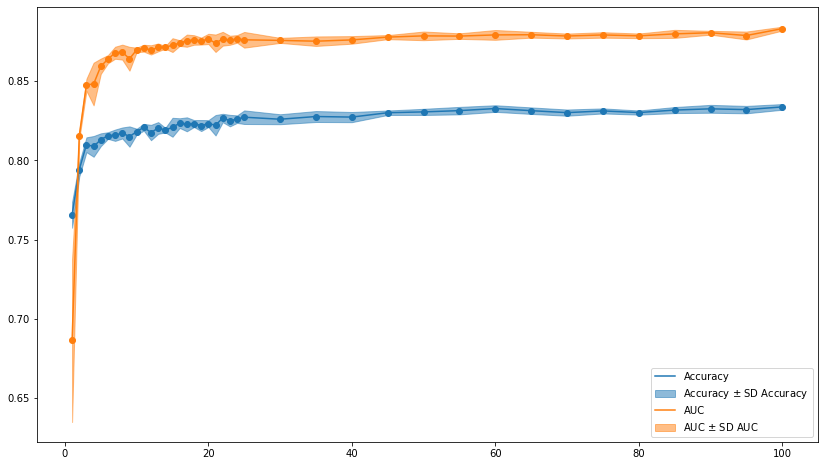

In [9]:
result_n_epochs = utils.hp_tuning.evaluate_n_epochs_through_prediction(
    data_train=data_train,
    data_test=data_test,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder="tabGAN-qtr",
    n_epochs_vec = n_epochs_vec,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_epochs.svg",
    legend_pos="lower right"
)

In [ ]:
#result_n_epochs

In [5]:
lr_vec = [1e-1, 5e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 1e-5]
n_synthetic_datasets_lr_comparison = 10
n_epochs_lr = 100

def create_tabGAN_for_lr(adam_lr):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_lr,
    hyperparams_vec=lr_vec,
    n_epochs=n_epochs_lr,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "learning_rate",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/110 [00:00<?, ?it/s]

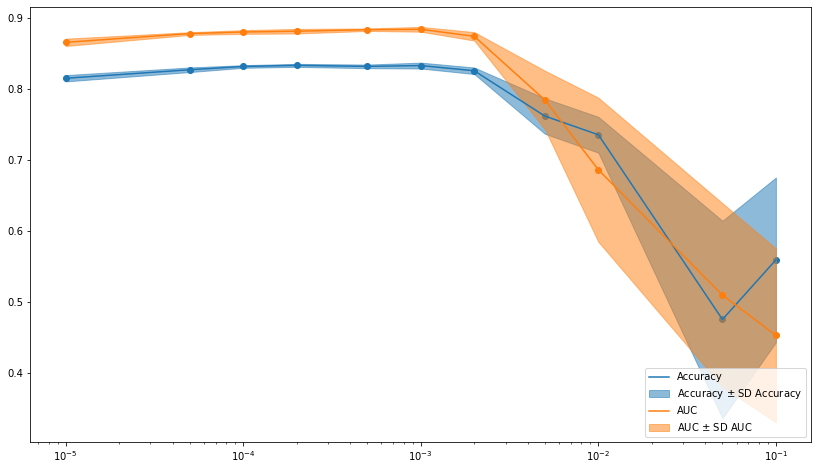

In [12]:
result_lr = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=lr_vec,
    hyperparams_name = "learning_rate",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_lr.svg",
    legend_pos="lower right",
    x_scale="log",
    incl_comparison_folder=True
)

In [13]:
result_lr

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,learning_rate_0.1,0.559329,0.453252,0.115768,0.122132
1,learning_rate_0.05,0.475578,0.509895,0.138740,0.129101
2,learning_rate_0.01,0.735219,0.686055,0.025204,0.101284
3,learning_rate_0.005,0.761448,0.784127,0.024862,0.041137
4,learning_rate_0.002,0.825139,0.873567,0.004577,0.005957
5,learning_rate_0.001,0.832457,0.883441,0.004156,0.003381
6,learning_rate_0.0005,0.831321,0.882893,0.002537,0.001741
7,learning_rate_0.0002,0.832736,0.880764,0.002117,0.003232
8,learning_rate_0.0001,0.831162,0.879639,0.001866,0.002592
9,learning_rate_5e-05,0.826580,0.877448,0.003239,0.001924


In [9]:
adam_beta1_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
n_synthetic_datasets_adam_beta1_comparison = 10
n_epochs_adam_beta1 = 100

def create_tabGAN_for_adam_beta1(adam_beta1):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta1,
    hyperparams_vec=adam_beta1_vec,
    n_epochs=n_epochs_adam_beta1,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta1_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta1",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/110 [00:00<?, ?it/s]

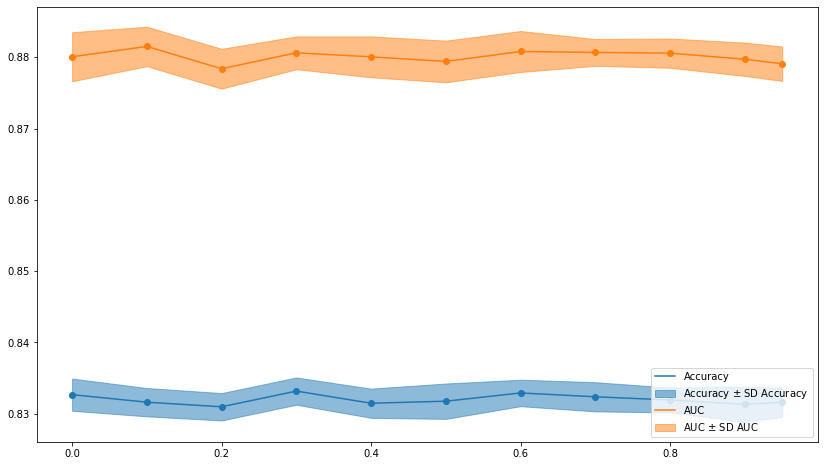

In [11]:
result_adam_beta1 = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta1_vec,
    hyperparams_name = "adam_beta1",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta1_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_beta1.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [72]:
result_adam_beta1

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta1_0,0.833639,0.881278,0.002455,0.004128
1,adam_beta1_0.1,0.832789,0.882001,0.001124,0.003088
2,adam_beta1_0.2,0.830784,0.879345,0.001672,0.002553
3,adam_beta1_0.3,0.833785,0.880704,0.001461,0.002446
4,adam_beta1_0.4,0.832098,0.879639,0.001296,0.003625
5,adam_beta1_0.5,0.831700,0.879993,0.002079,0.002480
6,adam_beta1_0.6,0.832975,0.882811,0.001500,0.001176
7,adam_beta1_0.7,0.833201,0.880946,0.001941,0.001423
8,adam_beta1_0.8,0.831036,0.880944,0.002132,0.000885
9,adam_beta1_0.9,0.830478,0.878985,0.003406,0.002928


In [12]:
adam_beta2_vec = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]
n_synthetic_datasets_adam_beta2_comparison = 10
n_epochs_adam_beta2 = 100

def create_tabGAN_for_adam_beta2(adam_beta2):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta2,
    hyperparams_vec=adam_beta2_vec,
    n_epochs=n_epochs_adam_beta2,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta2_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta2",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/120 [00:00<?, ?it/s]

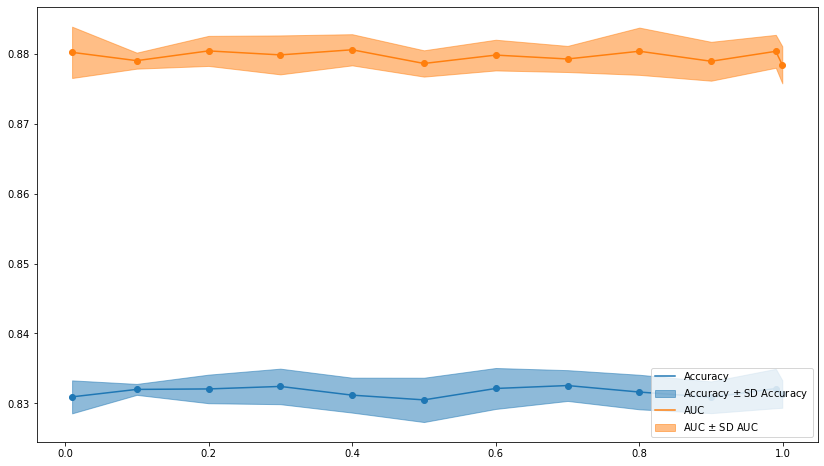

In [13]:
result_adam_beta2 = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta2_vec,
    hyperparams_name = "adam_beta2",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta2_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_beta2.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False,
)

In [14]:
result_adam_beta2

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta2_0.01,0.830923,0.880237,0.002359,0.003672
1,adam_beta2_0.1,0.831992,0.879047,0.000783,0.001146
2,adam_beta2_0.2,0.832058,0.880443,0.002044,0.002150
3,adam_beta2_0.3,0.832417,0.879872,0.002542,0.002786
4,adam_beta2_0.4,0.831169,0.880603,0.002499,0.002230
5,adam_beta2_0.5,0.830491,0.878645,0.003171,0.001881
6,adam_beta2_0.6,0.832125,0.879844,0.002930,0.002197
7,adam_beta2_0.7,0.832543,0.879288,0.002204,0.001868
8,adam_beta2_0.8,0.831614,0.880396,0.002472,0.003382
9,adam_beta2_0.9,0.830863,0.878960,0.002269,0.002782


In [8]:
n_critic_vec = np.arange(1,26)
n_synthetic_datasets_n_critic_comparison = 10
n_epochs_n_critic = 100

def create_tabGAN_for_n_critic(n_critic):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_critic,
    hyperparams_vec=n_critic_vec,
    n_epochs=n_epochs_n_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    overwrite_dataset=False
)

  0%|          | 0/250 [00:00<?, ?it/s]

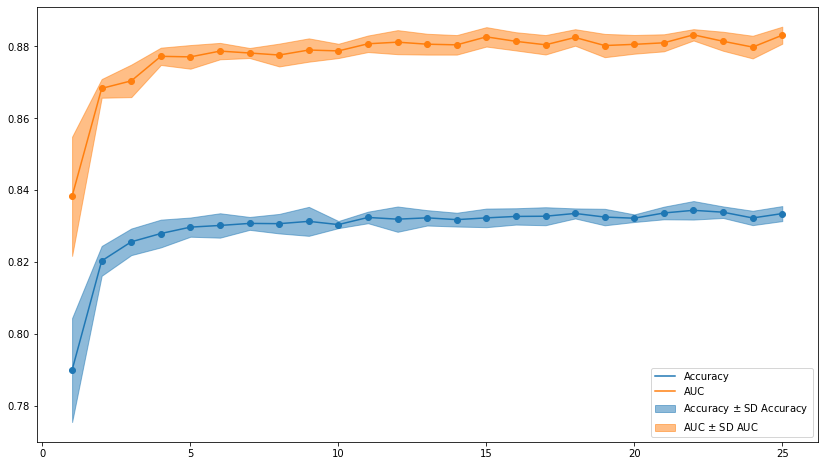

In [20]:
result_n_critic = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_critic_vec,
    hyperparams_name = "n_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_critic_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_critic.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [22]:
#result_n_critic

In [22]:
qtr_spread_vec = np.round(np.linspace(0, 1, 21),2)
n_synthetic_datasets_qtr_spread_comparison = 10
n_epochs_qtr_spread = 100

def create_tabGAN_for_qtr_spread(qtr_spread):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     qtr_spread=qtr_spread)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qtr_spread,
    hyperparams_vec=qtr_spread_vec,
    n_epochs=n_epochs_qtr_spread,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qtr_spread_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qtr_spread",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    overwrite_dataset=False
)

  0%|          | 0/210 [00:00<?, ?it/s]

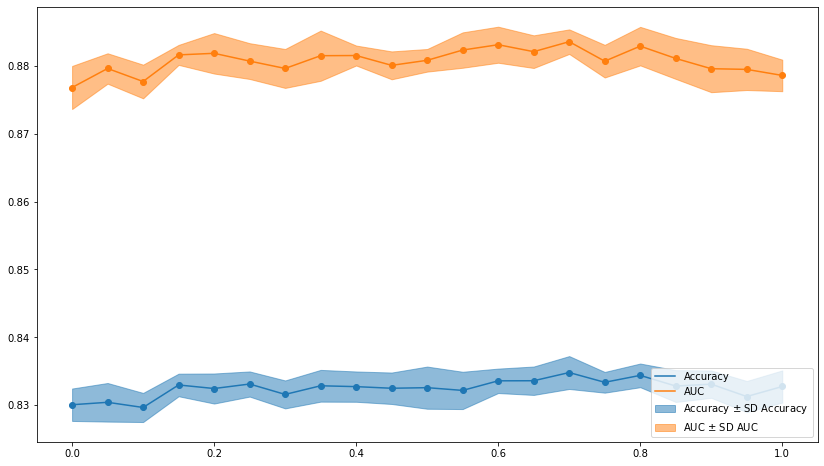

In [23]:
result_qtr_spread = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qtr_spread_vec,
    hyperparams_name = "qtr_spread",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qtr_spread_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_qtr_spread.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [73]:
#result_qtr_spread

In [6]:
gumbel_temp_vec = np.round(np.linspace(0.001, 0.009, 9), 4).tolist()
gumbel_temp_vec += np.round(np.linspace(0.01, 0.19, 19), 3).tolist()
gumbel_temp_vec += np.round(np.linspace(0.2, 2, 19),2).tolist()
n_synthetic_datasets_gumbel_temp_comparison = 10
n_epochs_gumbel_temp = 100

def create_tabGAN_for_gumbel_temp(gumbel_temp):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     gumbel_temperature=gumbel_temp)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_gumbel_temp,
    hyperparams_vec=gumbel_temp_vec,
    n_epochs=n_epochs_gumbel_temp,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_gumbel_temp_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "gumbel_temp",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/470 [00:00<?, ?it/s]

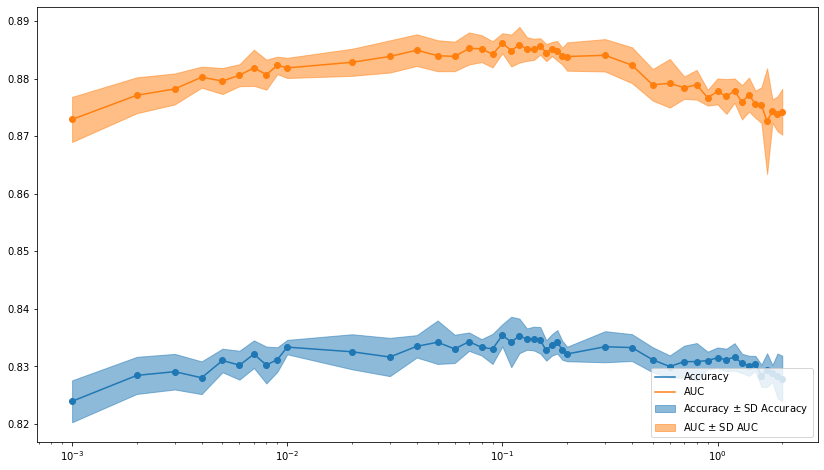

In [7]:
result_gumbel_temp = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=gumbel_temp_vec,
    hyperparams_name = "gumbel_temp",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_gumbel_temp_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_gumbel_temp.svg",
    legend_pos="lower right",
    x_scale="log",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [74]:
#result_gumbel_temp

In [16]:
qtr_lbound_apply_vec = np.round(np.linspace(0.02, 0.2, 10),2).tolist() + np.round(np.linspace(0.002, 0.01, 5),3).tolist()
n_synthetic_datasets_qtr_lbound_apply_comparison = 10
n_epochs_qtr_lbound_apply = 100

def create_tabGAN_for_qtr_lbound_apply(qtr_lbound_apply):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     qtr_lbound_apply=qtr_lbound_apply)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qtr_lbound_apply,
    hyperparams_vec=qtr_lbound_apply_vec,
    n_epochs=n_epochs_qtr_lbound_apply,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qtr_lbound_apply_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qtr_lbound_apply",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/150 [00:00<?, ?it/s]

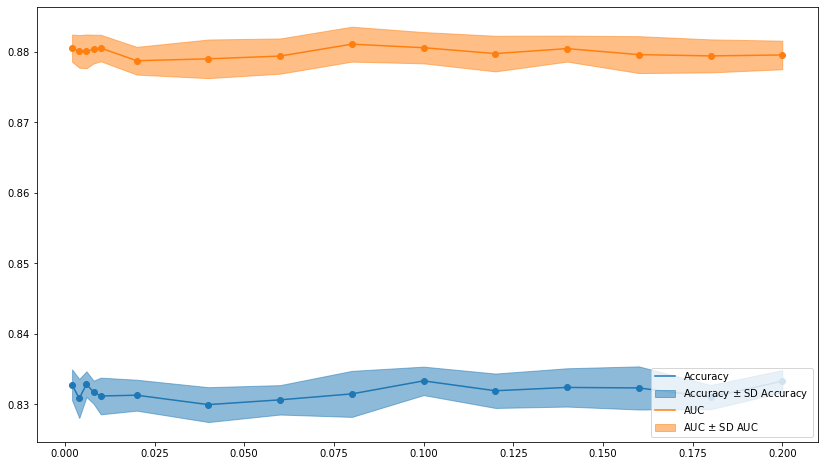

In [22]:
result_qtr_lbound_apply = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qtr_lbound_apply_vec,
    hyperparams_name = "qtr_lbound_apply",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qtr_lbound_apply_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_qtr_lbound_apply.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [19]:
result_qtr_lbound_apply

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,qtr_lbound_apply_0.02,0.831308,0.878738,0.002194,0.001968
1,qtr_lbound_apply_0.04,0.829973,0.879007,0.002470,0.002740
2,qtr_lbound_apply_0.06,0.830651,0.879398,0.002087,0.002500
3,qtr_lbound_apply_0.08,0.831494,0.881086,0.003265,0.002478
4,qtr_lbound_apply_0.1,0.833340,0.880582,0.002019,0.002217
5,qtr_lbound_apply_0.12,0.831939,0.879752,0.002440,0.002528
6,qtr_lbound_apply_0.14,0.832410,0.880455,0.002717,0.001844
7,qtr_lbound_apply_0.16,0.832337,0.879604,0.003058,0.002616
8,qtr_lbound_apply_0.18,0.831042,0.879423,0.001716,0.002343
9,qtr_lbound_apply_0.2,0.833293,0.879553,0.001578,0.002025


In [20]:
dim_hidden_vec = [16, 32, 64, 96, 128, 192, 256, 384, 512, 786, 1024]
n_synthetic_datasets_dim_hidden_comparison = 10
n_epochs_dim_hidden = 100

def create_tabGAN_for_dim_hidden(dim_hidden):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     dim_hidden=dim_hidden)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dim_hidden,
    hyperparams_vec=dim_hidden_vec,
    n_epochs=n_epochs_dim_hidden,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dim_hidden_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dim_hidden",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/110 [00:00<?, ?it/s]

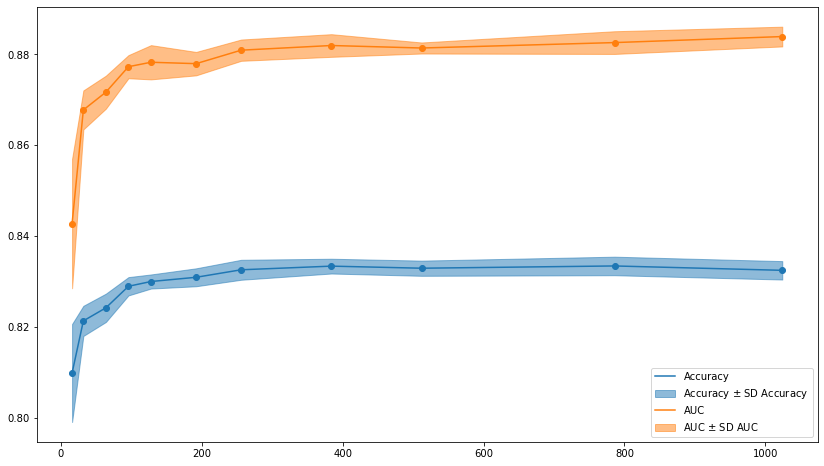

In [21]:
result_dim_hidden = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dim_hidden_vec,
    hyperparams_name = "dim_hidden",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dim_hidden_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dim_hidden.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [23]:
result_dim_hidden

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,dim_hidden_16,0.809841,0.842751,0.010797,0.014245
1,dim_hidden_32,0.821315,0.867768,0.003319,0.004293
2,dim_hidden_64,0.824197,0.871687,0.003120,0.003631
3,dim_hidden_96,0.828938,0.877291,0.002017,0.002547
4,dim_hidden_128,0.829987,0.878267,0.001554,0.003771
5,dim_hidden_192,0.830916,0.877959,0.001975,0.002579
6,dim_hidden_256,0.832570,0.880928,0.002199,0.002342
7,dim_hidden_384,0.833373,0.881955,0.001628,0.002494
8,dim_hidden_512,0.832915,0.881405,0.001675,0.001216
9,dim_hidden_786,0.833413,0.882599,0.002041,0.002499


In [114]:
dim_latent_vec = [16, 32, 64, 96, 128, 192, 256, 384, 512, 786, 1024]
n_synthetic_datasets_dim_latent_comparison = 10
n_epochs_dim_latent = 100

def create_tabGAN_for_dim_latent(dim_latent):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     dim_latent=dim_latent)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dim_latent,
    hyperparams_vec=dim_latent_vec,
    n_epochs=n_epochs_dim_latent,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dim_latent_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dim_latent",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/110 [00:00<?, ?it/s]

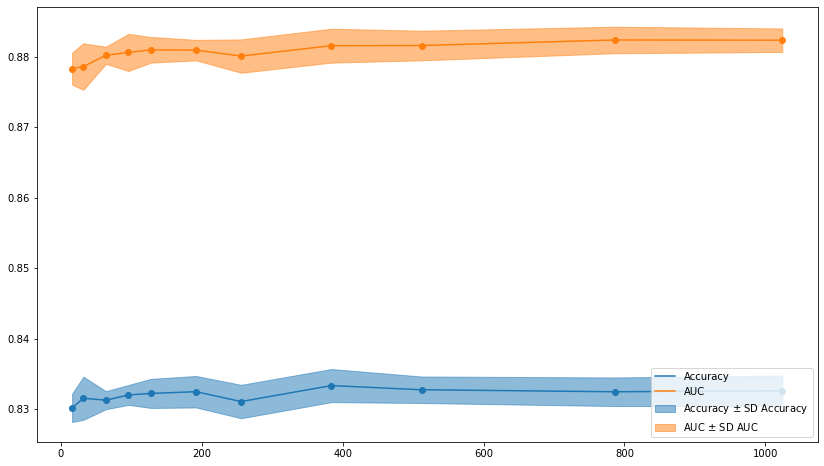

In [125]:
result_dim_latent = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dim_latent_vec,
    hyperparams_name = "dim_latent",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dim_latent_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dim_latent.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_dim_latent

In [134]:
wgan_lambda_vec = np.arange(0,11, 1).tolist() + np.arange(12,21,2).tolist()
n_synthetic_datasets_wgan_lambda_comparison = 10
n_epochs_wgan_lambda = 100

def create_tabGAN_for_wgan_lambda(wgan_lambda):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     wgan_lambda=wgan_lambda)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_wgan_lambda,
    hyperparams_vec=wgan_lambda_vec,
    n_epochs=n_epochs_wgan_lambda,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_wgan_lambda_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "wgan_lambda",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/160 [00:00<?, ?it/s]

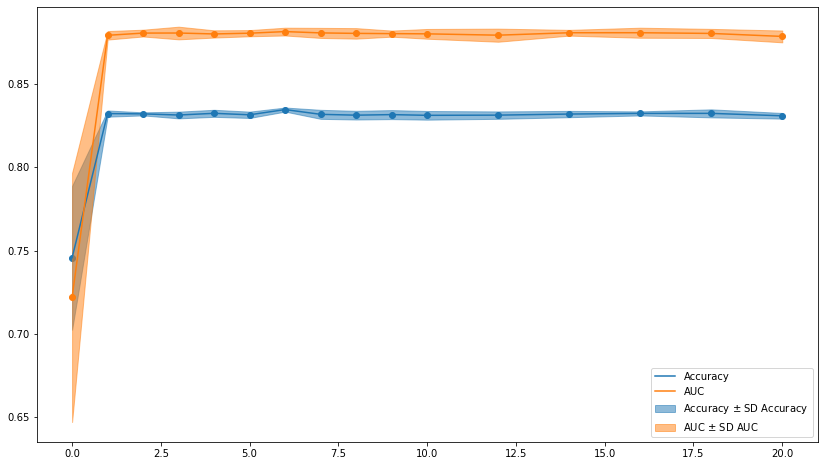

In [135]:
result_wgan_lambda = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=wgan_lambda_vec,
    hyperparams_name = "wgan_lambda",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_wgan_lambda_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_wgan_lambda.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_wgan_lambda

In [127]:
n_quantiles_int_vec = [10, 50, 100, 250, 500, 750, 1000, 2500, 5000, 10000]
n_synthetic_datasets_n_quantiles_int_comparison = 10
n_epochs_n_quantiles_int = 100

def create_tabGAN_for_n_quantiles_int(n_quantiles_int):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     n_quantiles_int=n_quantiles_int)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_quantiles_int,
    hyperparams_vec=n_quantiles_int_vec,
    n_epochs=n_epochs_n_quantiles_int,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_quantiles_int_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_quantiles_int",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/100 [00:00<?, ?it/s]

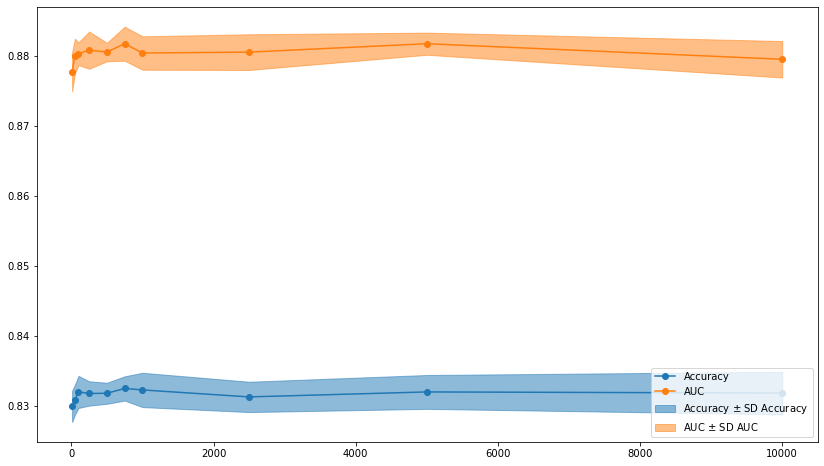

In [155]:
result_n_quantiles_int = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_quantiles_int_vec,
    hyperparams_name = "n_quantiles_int",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_quantiles_int_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_quantiles_int.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [156]:
result_n_quantiles_int

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,n_quantiles_int_10,0.829947,0.877735,0.002236,0.002787
1,n_quantiles_int_50,0.830903,0.880001,0.002145,0.002495
2,n_quantiles_int_100,0.832012,0.880346,0.002294,0.001619
3,n_quantiles_int_250,0.831793,0.880850,0.001739,0.002662
4,n_quantiles_int_500,0.831819,0.880581,0.001504,0.001318
5,n_quantiles_int_750,0.832510,0.881768,0.001734,0.002435
6,n_quantiles_int_1000,0.832297,0.880441,0.002453,0.002387
7,n_quantiles_int_2500,0.831301,0.880570,0.002167,0.002551
8,n_quantiles_int_5000,0.832012,0.881770,0.002419,0.001583
9,n_quantiles_int_10000,0.831853,0.879547,0.003042,0.002606


In [272]:
adam_beta1_vec_partial = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
adam_beta2_vec_partial = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.999]
amsgrad_vec_partial = [False, True]
adam_betas_vec = [(beta1, beta2, amsgrad) for beta1 in adam_beta1_vec_partial for beta2 in adam_beta2_vec_partial
                  for amsgrad in amsgrad_vec_partial]
n_synthetic_datasets_adam_betas_comparison = 10
n_epochs_adam_betas = 100

def create_tabGAN_for_adam_betas(adam_beta1, adam_beta2, adam_amsgrad):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, opt_lr = adam_lr, adam_beta1 = adam_beta1, adam_amsgrad=adam_amsgrad,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr
small_adam_betas_vec = (0.5, 0.5, True), (0.5, 0.7, False), (0.5, 0.7, True), (0.5, 0.9, False)

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_betas,
    hyperparams_vec=adam_betas_vec,
    n_epochs=n_epochs_adam_betas,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_betas_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam",
    hyperparams_subname = ["beta1", "beta2", "amsgrad"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_adam_betas = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec= adam_betas_vec,
    hyperparams_name = "adam",
    hyperparams_subname = ["beta1", "beta2", "amsgrad"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_betas_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_betas.svg",
    legend_pos=["lower left", "lower center"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"$\beta_2=$", r"Amsgrad$=$"],
    separate_legends=True
)

In [350]:
result_adam_betas

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta1_0_beta2_0.01_amsgrad_False,0.830093,0.879484,0.002485,0.003470
1,adam_beta1_0_beta2_0.01_amsgrad_True,0.827052,0.876474,0.002413,0.002283
2,adam_beta1_0_beta2_0.1_amsgrad_False,0.831149,0.879652,0.002262,0.003456
3,adam_beta1_0_beta2_0.3_amsgrad_False,0.830053,0.879548,0.002680,0.002575
4,adam_beta1_0_beta2_0.5_amsgrad_False,0.831965,0.880317,0.002794,0.002532
...,...,...,...,...,...
60,adam_beta1_0.9_beta2_0.5_amsgrad_True,0.823386,0.874744,0.003538,0.003868
61,adam_beta1_0.9_beta2_0.7_amsgrad_False,0.832450,0.880258,0.001671,0.002018
62,adam_beta1_0.9_beta2_0.9_amsgrad_False,0.831514,0.878763,0.002626,0.002693
63,adam_beta1_0.9_beta2_0.999_amsgrad_False,0.831321,0.879941,0.001835,0.002706


In [164]:
sgd_momentum_vec_partial = np.round(np.linspace(0, 0.9, 10), 2).tolist() + [0.95, 0.99]
sgd_nesterov_vec_partial = [False, True]
sgd_vec = [(sgd_momentum, sgd_nesterov) for sgd_momentum in sgd_momentum_vec_partial for sgd_nesterov in sgd_nesterov_vec_partial]
n_synthetic_datasets_sgd_comparison = 10
n_epochs_sgd = 100

def create_tabGAN_for_sgd(sgd_momentum, sgd_nesterov):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, optimizer="sgd", opt_lr = adam_lr, sgd_momentum=sgd_momentum,
                      sgd_nesterov=sgd_nesterov, quantile_transformation_int = True,
                      quantile_rand_transformation = True, noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_sgd,
    hyperparams_vec=sgd_vec,
    n_epochs=n_epochs_sgd,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_sgd_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "sgd",
    hyperparams_subname = ["momentum", "nesterov"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/240 [00:00<?, ?it/s]

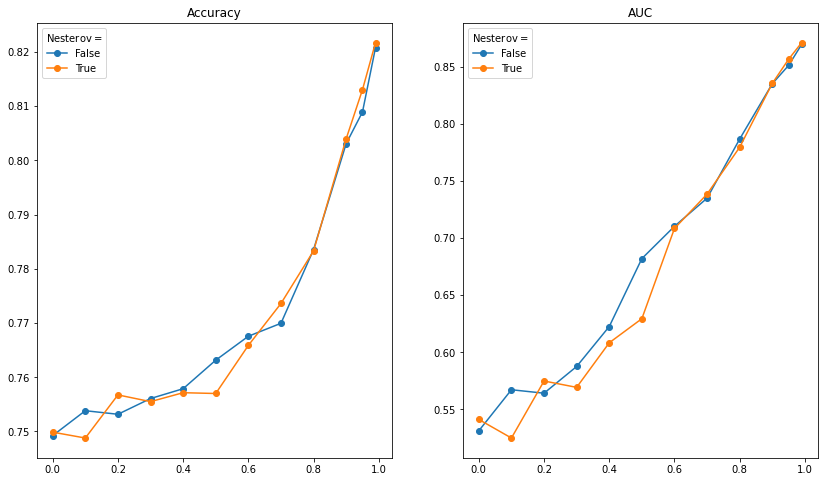

In [176]:
result_sgd = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=sgd_vec,
    hyperparams_name = "sgd",
    hyperparams_subname = ["momentum", "nesterov"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_sgd_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_sgd.svg",
    legend_pos="best",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= r"Nesterov$=$"
)

In [175]:
result_sgd

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,sgd_momentum_0.0_nesterov_False,0.749236,0.531203,0.006492,0.061608
1,sgd_momentum_0.0_nesterov_True,0.749867,0.541107,0.004059,0.063515
2,sgd_momentum_0.1_nesterov_False,0.753825,0.567152,0.007042,0.060533
3,sgd_momentum_0.1_nesterov_True,0.748785,0.524835,0.003515,0.066110
4,sgd_momentum_0.2_nesterov_False,0.753167,0.564114,0.006158,0.064437
5,sgd_momentum_0.2_nesterov_True,0.756740,0.574804,0.005475,0.041327
6,sgd_momentum_0.3_nesterov_False,0.756069,0.587535,0.002356,0.045462
7,sgd_momentum_0.3_nesterov_True,0.755498,0.569240,0.005080,0.045044
8,sgd_momentum_0.4_nesterov_False,0.757882,0.622541,0.003153,0.030449
9,sgd_momentum_0.4_nesterov_True,0.757145,0.608299,0.006108,0.092067
